In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Hypothesis Testing
Our hypothesis is as follows:

$$H_0: \mu \leq 70$$
$$H_1: \mu \gt 70$$

<br>
<center>
    $H_0$: The mean height of our coffee drinkers is less or equal than 70 inches. <br>
    $H_1$: The mean height of our coffee drinkers is greater than 70 inches. 
</center>

In [3]:
df = pd.read_csv('coffee_dataset.csv')

In [4]:
#data = df['drinks_coffee'].values.astype('int32')

## Hypothesis Testing with bootstraping:
We want to show that if we randomly select samples of our data and calculate the distribution of the calculated means, we will be able to reject/accept the null hypothesis.

In [5]:
means = []
for i in range(10000):
    means.append(df.sample(150)['height'].mean())

In [6]:
percentiles = np.percentile(means, [2.5, 97.5])

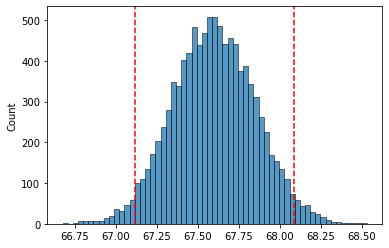

In [7]:
sns.histplot(means)
plt.axvline(x=percentiles[0], color='red', linestyle='--')
plt.axvline(x=percentiles[1], color='red', linestyle='--')
plt.show()

We can see that with a 95% confidence interval that our mean might be below 70, so we can accept our null hypothesis.

## Hypothesis Testing with normal distribution:
In this case we create a normal distribution with the expected mean of 70 and compare a distribution with this mean value and one with the mean calculated.

In [8]:
mean = 70

In [9]:
std = np.std(means)

In [10]:
distribution = np.random.normal(mean, std, 10000)

percentiles_distribution = np.percentile(distribution, [2.5, 97.5])

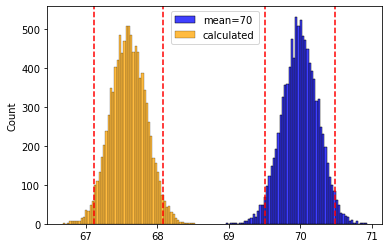

In [11]:
sns.histplot(distribution, color='blue', label='mean=70')
sns.histplot(means, color='orange', label='calculated')
plt.axvline(x=percentiles[0], color='red', linestyle='--')
plt.axvline(x=percentiles[1], color='red', linestyle='--')
plt.axvline(x=percentiles_distribution[0], color='red', linestyle='--')
plt.axvline(x=percentiles_distribution[1], color='red', linestyle='--')
plt.legend()
plt.show()

We can see that if our data had a mean of 70 it would have a normal distribution like the one shown above, therefore it is more likely that our data has a mean lower than 70.

## Hypothesis Testing Pt.2
Now we want to test the following:

$$H_0: \mu_{coff} = \mu_{noncoff}$$
$$H_1: \mu_{coff} \neq \mu_{noncoff}$$

<br>
<center>
    $H_0$: The mean height of the coffee drinkers is the same as the mean height of the non coffee drinkers. <br>
    $H_1$: The mean height of the coffee drinkers is not the same as the mean height of the non coffee drinkers. 
</center>

In [12]:
df_coffee = df[df['drinks_coffee']==True]

In [13]:
df_non_coffee = df[df['drinks_coffee']==False]

In [14]:
coffee_means = []
non_coffee_means = []
diff_means = []

for i in range(10000):
    coffee_mean = np.mean(df_coffee.sample(150)['height'])
    non_coffee_mean = np.mean(df_non_coffee.sample(150)['height'])
    coffee_means.append(coffee_mean)
    non_coffee_means.append(non_coffee_mean)
    diff_means.append(coffee_mean - non_coffee_mean)

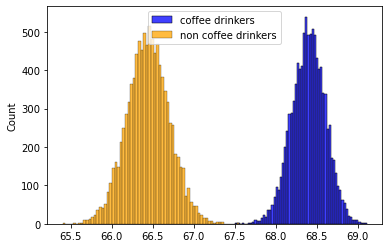

In [15]:
sns.histplot(coffee_means, color='blue', label='coffee drinkers')
sns.histplot(non_coffee_means, color='orange', label='non coffee drinkers')
plt.legend()
plt.show()

We can see our coffee and non coffee drinkers distribution above. Below we see the calculated distribution of the difference between both distributions compared of what we will expect if the difference between both means is zero.

In [16]:
diff_normal = np.random.normal(0.0, np.std(diff_means), 10000 )

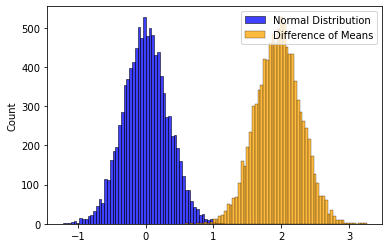

In [17]:
sns.histplot(diff_normal, color='blue', label='Normal Distribution')
sns.histplot(diff_means, color='orange', label='Difference of Means')
plt.legend()
plt.show()

We clearly see that our mean is not zero and therefore we can reject our null hypothesis.

In [18]:
np.mean(diff_means)

1.9565221827224286

## P-value
The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

The more extreme in favor of the alternative portion of this statement determines the shading associated with your p-value.

You have the following cases:
* If your parameter is greater than some value in the alternative hypothesis, your shading would look like this to obtain your p-value:

 <img src="p_get.png" alt="p_get" width="500" height="600"> 


If your parameter is less than some value in the alternative hypothesis, your shading would look like this to obtain your p-value:

 <img src="p_let.png" alt="p_let" width="500" height="600"> 



If your parameter is not equal to some value in the alternative hypothesis, your shading would look like this to obtain your p-value:

 <img src="p_neq.png" alt="neq" width="500" height="600"> 


The process to perform a p-value test can be resumed as:
   1. Simulate the values of your statistic that are possible from the null.
   2. Calculate the value of the statistic you actually obtained in your data.
   3. Compare your statistic to the values from the null.
   4. Calculate the proportion of null values that are considered extreme based on your alternative.



## Hypothesis test Example:
We will simulate how we can use the p-value to test our hypothesis.

In [19]:
# 1. Simulate the values of your statistic that are possible from the null.

means = []
for i in range(10000):
    means.append(df.sample(150)['height'].mean())

mean = 70
std = np.std(means)

null_val = np.random.normal(mean, std, 10000)

In [20]:
# 2. Calculate the value of the statistic you actually obtained in your data.

mu = df['height'].mean()

Here we decide what type of test must be performed depending on the hypothesis test. Let's first try to test the following:

$$H_0: \mu \leq 70$$
$$H_1: \mu \gt 70$$



In [21]:
# 3. Compare your statistic to the values from the null.
# 4. Calculate the proportion of null values that are considered extreme based on your alternative.

p = (null_val > mu).mean()
p

1.0

The image below shows the region in which we test our p-value. As our result shows, we have strong evidence to fail to reject our null hyphotesis.

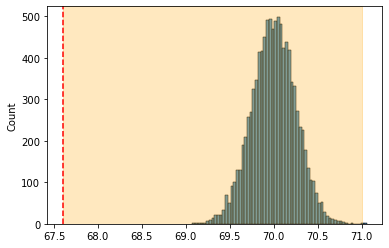

In [22]:
sns.histplot(null_val)
plt.axvspan(mu, 71, alpha=0.25, color='orange')
plt.axvline(x=mu, color='red', linestyle='--')
plt.show()

Let's now try with the following hypothesis test:

$$H_0: \mu \geq 70$$
$$H_1: \mu \lt 70$$

In [23]:
# 3. Compare your statistic to the values from the null.
# 4. Calculate the proportion of null values that are considered extreme based on your alternative.

p = (null_val < mu).mean()
p

0.0

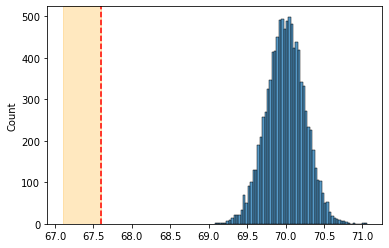

In [24]:
sns.histplot(null_val)
plt.axvspan(mu-0.5, mu, alpha=0.25, color='orange')
plt.axvline(x=mu, color='red', linestyle='--')
plt.show()

Now we see that our result shows that we can reject the null hypothesis.

As a final example, let's evaluate this hypothesis:

$$H_0: \mu = 70$$
$$H_1: \mu \neq 70$$

In [25]:
low = mu
high = mean + (mean - mu)

p = (null_val <= low).mean() + (null_val >= high).mean()
p

0.0

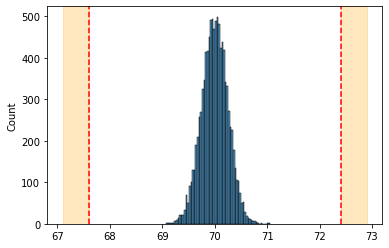

In [26]:
sns.histplot(null_val)
plt.axvspan(low-0.5, low, alpha=0.25, color='orange')
plt.axvspan(high, high+0.5, alpha=0.25, color='orange')
plt.axvline(x=low, color='red', linestyle='--')
plt.axvline(x=high, color='red', linestyle='--')
plt.show()

In this case we see that we can also reject our null hypothesis.

## Conclusion on Hypothesis Testing


The word accept is one that is avoided when making statements regarding the null and alternative. You are not stating that one of the hypotheses is true. Rather, you are making a decision based on the likelihood of your data coming from the null hypothesis with regard to your type I error threshold.

Therefore, the wording used in conclusions of hypothesis testing includes: **We reject the null hypothesis** or **We fail to reject the null hypothesis**. This lends itself to the idea that you start with the null hypothesis true by default, and "choosing" the null at the end of the test would have been the choice even if no data were collected.


## Error and thresholding
The p-value is the probability of getting our statistic or a more extreme value if the null is true.

Therefore, small p-values suggest our null is not true. Rather, our statistic is likely to have come from a different distribution than the null.

When the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null. 

That is:
<center>
    $p_{val} \leq \alpha$ we reject $H_0$ <br>
    $p_{val} \gt \alpha$ we accept $H_0$ <br>
<br>
    <b>If your p-val is less than $\alpha$ we say that our test is statistically significative.</b>
</center>
